PAN card tampering detection

The purpose of this project is to detect tampering of PAN card by using computer vision.
This project will help different organizations in detecting whether the PAN card provided to them by their employers or customers or anyone is original or not.
In this project, we will calculate structural similarity of original PAN card and PAN card uploaded by user.

In [2]:
# import the necessary libraries
from skimage.metrics import structural_similarity
import imutils
from PIL import Image
import cv2
import requests

In [3]:
# open original and tampered image respectively
original = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).raw)
tampered = Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png", stream=True).raw)

In [5]:
# getting the format of the images
print(f"Original image format is {original.format}")
print(f"Tampered image format is {tampered.format}")

Original image format is JPEG
Tampered image format is PNG


In [7]:
# getting the dimensions of the image (width x height)
print(f"Original image dimensions are {original.size}")
print(f"Tampered image dimensions are {tampered.size}")

Original image dimensions are (1200, 800)
Tampered image dimensions are (282, 179)


In [8]:
# resizing the images to same size
original = original.resize((250,160))
print(original.size)
tampered = tampered.resize((250,160))
print(tampered.size)

(250, 160)
(250, 160)


In [10]:
# saving both the images in the images folder
original.save(r"C:\Users\athar\Documents\vs code projecs\udemy 75 projects\1-pan card tampering detection\images\original.png")
tampered.save(r"C:\Users\athar\Documents\vs code projecs\udemy 75 projects\1-pan card tampering detection\images\tampered.png")

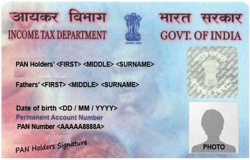

In [11]:
# visualizng original image
original

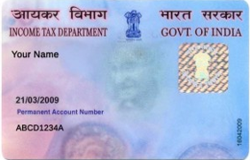

In [12]:
# visualizing tampered image
tampered

In [14]:
# load both images by using cv2
original = cv2.imread(r"C:\Users\athar\Documents\vs code projecs\udemy 75 projects\1-pan card tampering detection\images\original.png")
tampered = cv2.imread(r"C:\Users\athar\Documents\vs code projecs\udemy 75 projects\1-pan card tampering detection\images\tampered.png")

Converting the images to grayscale
Because grayscale images have only one color channel and they are easily understood by the machine

In [15]:
# converting images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_RGB2GRAY)

Structural similarity tells us that in terms of x and y coordinates how similar our images are

In [30]:
# computing SSIM (Structural Similarity Index Measure) for the original and tampered image
# diff contains the actual difference image and its values are between 0 and 1
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8") # multiplying diff by 255 to normalize it
print(f"SSIM is {score}")

SSIM is 0.31845231497433485


In [24]:
# calculating thresholds and contours
# threshold transforms the grayscale difference image into a binary image
threshold = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# contours work on binary images and they find the boundary points for objects in the image
cnts = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Bounding boxes help us to identify the locations where the images are different

In [31]:
# loop over the contours
for c in cnts:
    # applying contours on the image
    # applying bounding rectangles on every object of the image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(tampered, (x,y), (x+w, y+h), (0,0,255), 2)

Original image with contours


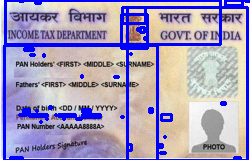

In [32]:
# displaying the original image with contours
print("Original image with contours")
Image.fromarray(original)

Tampered image with contours


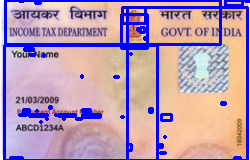

In [33]:
# displaying the tampered image with contours
print("Tampered image with contours")
Image.fromarray(tampered)

Difference image


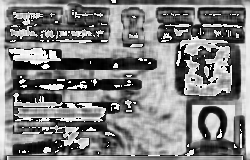

In [35]:
# displaying the difference image
# black portion is the difference between the images
print("Difference image")
Image.fromarray(diff)

Threshold image


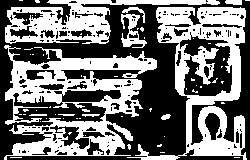

In [36]:
# displaying the threshold image
# white portion is the threshold difference between the images
print("Threshold image")
Image.fromarray(threshold)